In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 30)
df = pd.read_csv('hotel_bookings_data.csv')

In [2]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

In [5]:
df['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [6]:
columns = [x for x in df.columns]
percent=[]
for kolom in columns:
    percent.append(round(df[kolom].isnull().sum()/df[kolom].shape[0]*100, 2))
    
explore = df.describe(percentiles = [], include = 'all').T 
explore['missing'] = len(df) - explore['count'] 
explore['%'] = percent
explore = explore[['missing','%','min','max']]

explore = explore.replace(np.nan, '-', regex=True)
explore

,missing,%,min,max
hotel,0.0,0.00,-,-
is_canceled,0.0,0.00,0.0,1.0
lead_time,0.0,0.00,0.0,737.0
arrival_date_year,0.0,0.00,2017.0,2019.0
arrival_date_month,0.0,0.00,-,-
arrival_date_week_number,0.0,0.00,1.0,53.0
arrival_date_day_of_month,0.0,0.00,1.0,31.0
stays_in_weekend_nights,0.0,0.00,0.0,19.0
stays_in_weekdays_nights,0.0,0.00,0.0,50.0
adults,0.0,0.00,0.0,55.0


## Univariate Analysis

In [7]:
num_dtypes = ['int32','int64','float64']
cat_dtypes = ['object']

num_df = df.select_dtypes(include=num_dtypes)
cat_df = df.select_dtypes(include=cat_dtypes)

numericals = num_df.columns
categoricals = cat_df.columns

print(numericals)
print(categoricals)

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_weekdays_nights', 'adults',
       'children', 'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')
Index(['hotel', 'arrival_date_month', 'meal', 'city', 'market_segment',
       'distribution_channel', 'deposit_type', 'customer_type',
       'reservation_status'],
      dtype='object')


In [8]:
df[numericals].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
df[categoricals].describe()

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


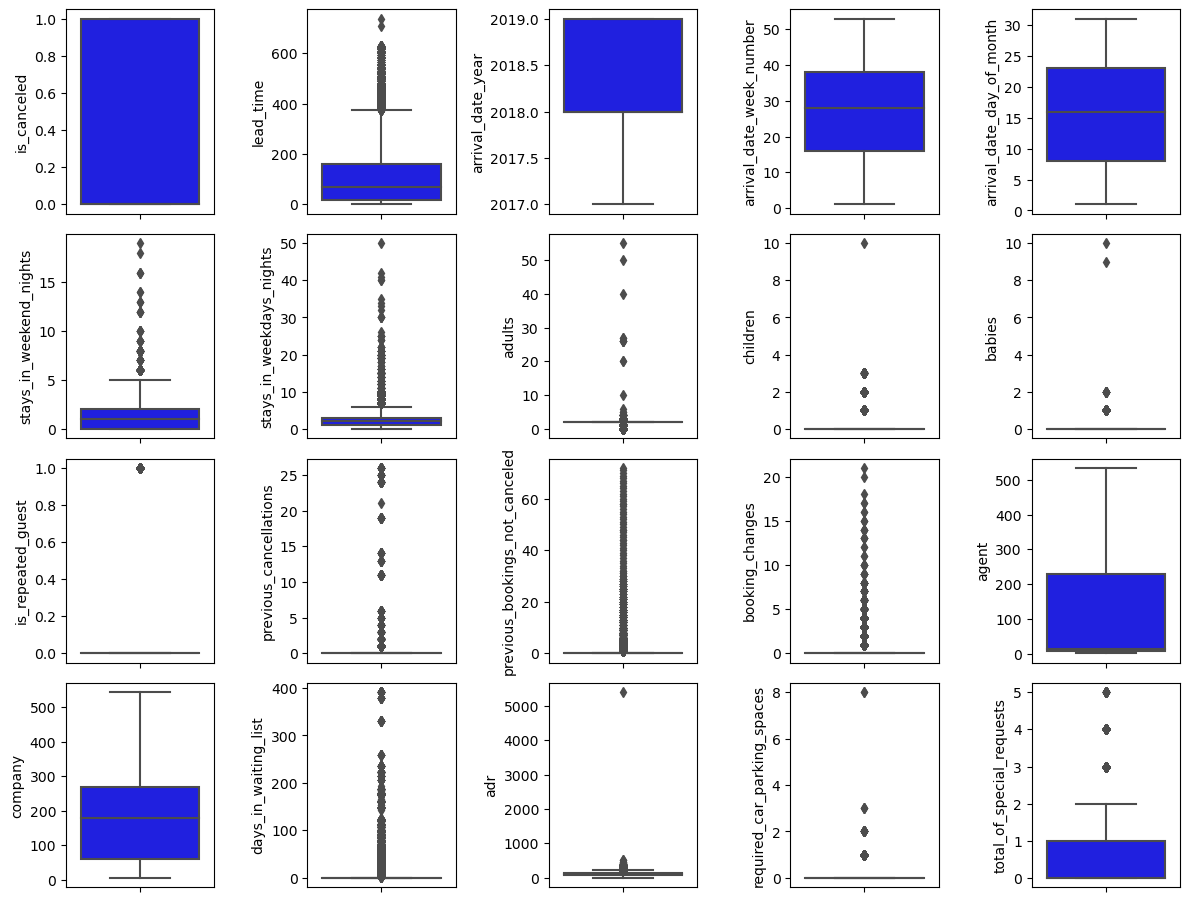

In [10]:
plt.figure(figsize=(12,45))
for i in range(0, len(numericals)):
    plt.subplot(len(numericals), 5,i+1)
    sns.boxplot(y=df[numericals[i]], color='blue', orient='v')
    plt.tight_layout()

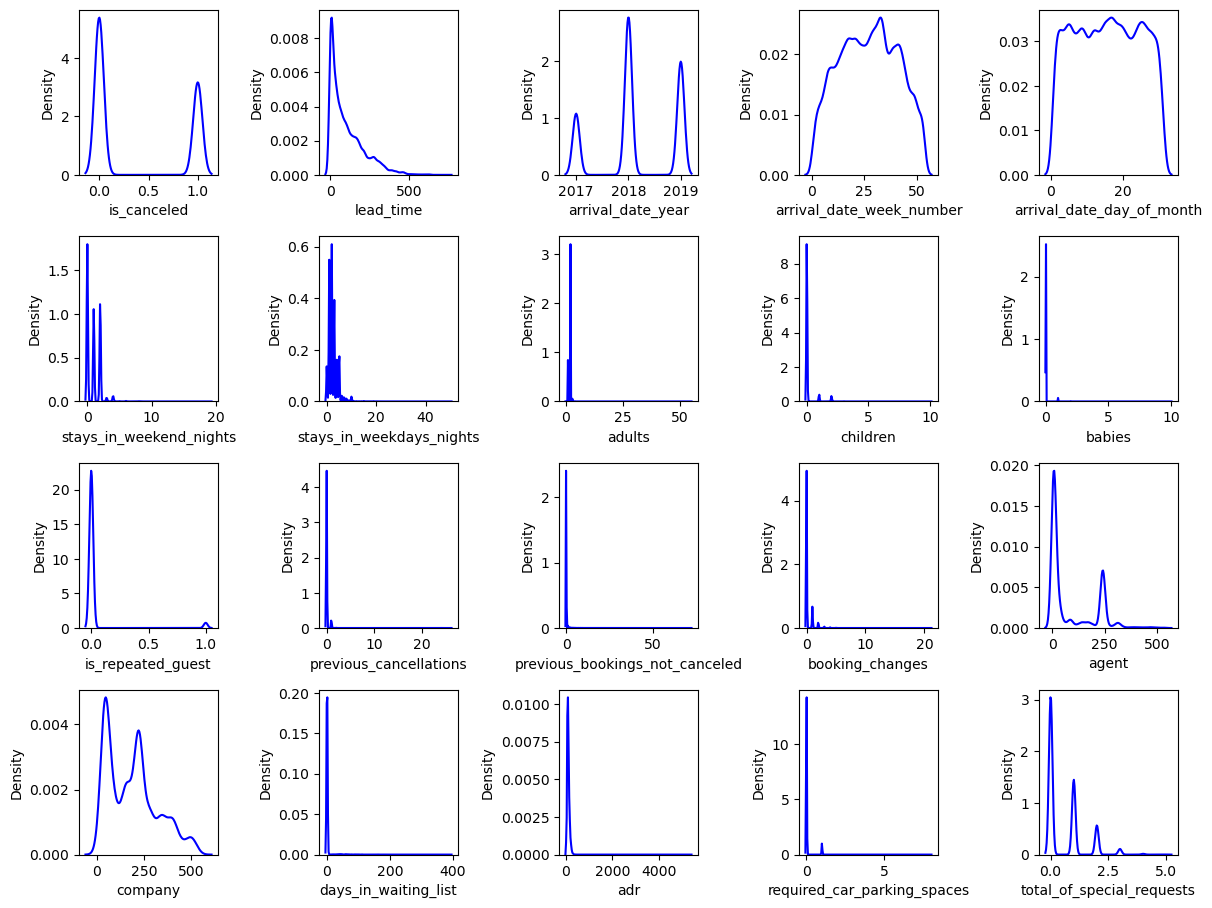

In [11]:
plt.figure(figsize=(12,45))
for i in range(0, len(numericals)):
    plt.subplot(len(numericals), 5,i+1)
    sns.kdeplot(x=df[numericals[i]], color='blue')
    plt.tight_layout()

# Data Preprocessing

# Handling Missing Value

In [43]:
from sklearn.impute import KNNImputer

df_num = df[numericals].copy()
impute_KNN = KNNImputer(n_neighbors=2)

df_num_imputed = pd.DataFrame(impute_KNN.fit_transform(df_num), columns=df_num.columns)

In [44]:
from sklearn.impute import SimpleImputer

df_cats = df[categoricals].copy()
imputer = SimpleImputer(strategy='constant', fill_value='missing')

df_cats_imputed = pd.DataFrame(imputer.fit_transform(df_cats), columns=df_cats.columns)

In [46]:
df_cats_imputed.replace('Undefined','No Meal', inplace=True)

In [47]:
df_new = df_num_imputed.join(df_cats_imputed)
df_new['num_cust'] = df_new.apply(lambda x: x['adults']+x['children']+x['babies'], axis=1)

In [48]:
df_new.drop(columns=['adults','children','babies'], inplace=True)

In [49]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  float64
 1   lead_time                       119390 non-null  float64
 2   arrival_date_year               119390 non-null  float64
 3   arrival_date_week_number        119390 non-null  float64
 4   arrival_date_day_of_month       119390 non-null  float64
 5   stays_in_weekend_nights         119390 non-null  float64
 6   stays_in_weekdays_nights        119390 non-null  float64
 7   is_repeated_guest               119390 non-null  float64
 8   previous_cancellations          119390 non-null  float64
 9   previous_bookings_not_canceled  119390 non-null  float64
 10  booking_changes                 119390 non-null  float64
 11  agent                           119390 non-null  float64
 12  company         

In [52]:
df_new.to_csv(r'C:\Users\Ferdy-Aditya\Documents\GitHub\hotel_booking_analysis\cleaned_dataframe.csv', index=False, header=True)

# Data Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 30)
df_new = pd.read_csv('cleaned_dataframe.csv')

In [2]:
df_new.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status,num_cust
0,0.0,342.0,2017.0,27.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,223.0,0.0,0.0,0.0,0.0,Resort Hotel,September,Breakfast,Kota Denpasar,Direct,Direct,No Deposit,Personal,Check-Out,2.0
1,0.0,737.0,2017.0,27.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,223.0,0.0,0.0,0.0,0.0,Resort Hotel,September,Breakfast,Kota Denpasar,Direct,Direct,No Deposit,Personal,Check-Out,2.0
2,0.0,7.0,2017.0,27.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,199.5,189.0,0.0,75.0,0.0,0.0,Resort Hotel,September,Breakfast,Kabupaten Bangka,Direct,Direct,No Deposit,Personal,Check-Out,1.0
3,0.0,13.0,2017.0,27.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,304.0,43.5,0.0,75.0,0.0,0.0,Resort Hotel,September,Breakfast,Kabupaten Bangka,Corporate,Corporate,No Deposit,Personal,Check-Out,1.0
4,0.0,14.0,2017.0,27.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,240.0,346.0,0.0,98.0,0.0,1.0,Resort Hotel,September,Breakfast,Kabupaten Bangka,Online TA,TA/TO,No Deposit,Personal,Check-Out,2.0


In [3]:
df_new['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [4]:
hotel_booking_per_month = df_new.groupby(['arrival_date_month', 'hotel']).agg(
    hotel_count=('hotel', 'count')
).reset_index()

hotel_booking_per_month

,arrival_date_month,hotel,hotel_count
0,April,City Hotel,4965
1,April,Resort Hotel,3103
2,August,City Hotel,7894
3,August,Resort Hotel,3045
4,December,City Hotel,7605
5,December,Resort Hotel,3555
6,February,City Hotel,4132
7,February,Resort Hotel,2648
8,January,City Hotel,4357
9,January,Resort Hotel,2437


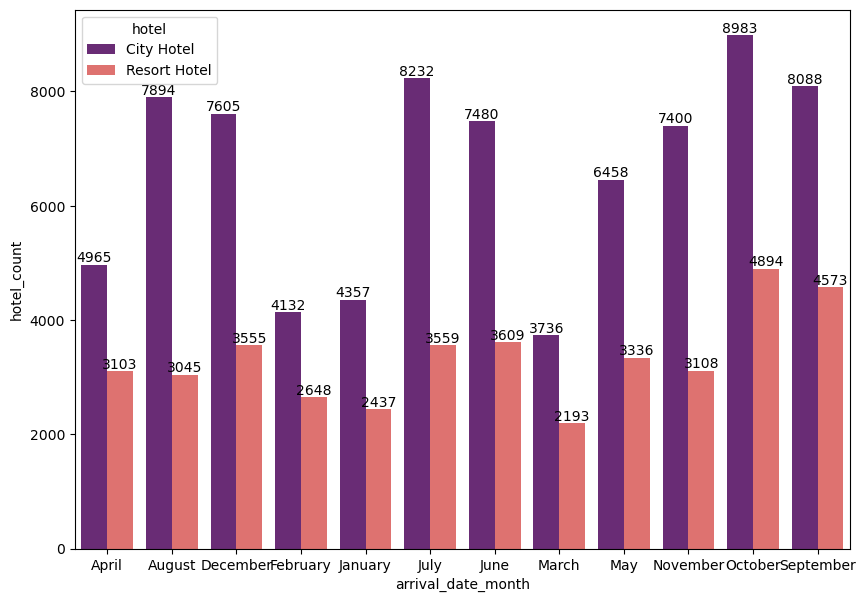

In [5]:
plt.figure(figsize=(10,7))
fig_1 = sns.barplot(data=hotel_booking_per_month, x='arrival_date_month', y='hotel_count', hue='hotel', palette='magma')

for i in range(2):
    fig_1.bar_label(fig_1.containers[i])

In [6]:
month_dict = {
    'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
    'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12
}

In [7]:
hotel_booking_per_month.sort_values('arrival_date_month', key=lambda x: x.apply(lambda x:month_dict[x]))

,arrival_date_month,hotel,hotel_count
8,January,City Hotel,4357
9,January,Resort Hotel,2437
6,February,City Hotel,4132
7,February,Resort Hotel,2648
15,March,Resort Hotel,2193
14,March,City Hotel,3736
0,April,City Hotel,4965
1,April,Resort Hotel,3103
17,May,Resort Hotel,3336
16,May,City Hotel,6458


In [8]:
booking_trends = df_new.groupby(['hotel', 'arrival_date_month', 'arrival_date_year']).agg(
    hotel_count = ('hotel','count')
).reset_index()

booking_trends_avg = booking_trends.groupby(['hotel', 'arrival_date_month']).agg({
    'hotel_count':'mean'
}).apply(lambda x: round(x,1)). reset_index()

booking_trends_avg = booking_trends_avg.sort_values('arrival_date_month', key=lambda x: x.apply(lambda x:month_dict[x]))
booking_trends_avg

,hotel,arrival_date_month,hotel_count
4,City Hotel,January,2178.5
16,Resort Hotel,January,1218.5
3,City Hotel,February,2066.0
15,Resort Hotel,February,1324.0
7,City Hotel,March,1868.0
19,Resort Hotel,March,1096.5
0,City Hotel,April,2482.5
12,Resort Hotel,April,1551.5
20,Resort Hotel,May,1668.0
8,City Hotel,May,3229.0


Text(10.6, 4750, 'X-mas\nSeason')

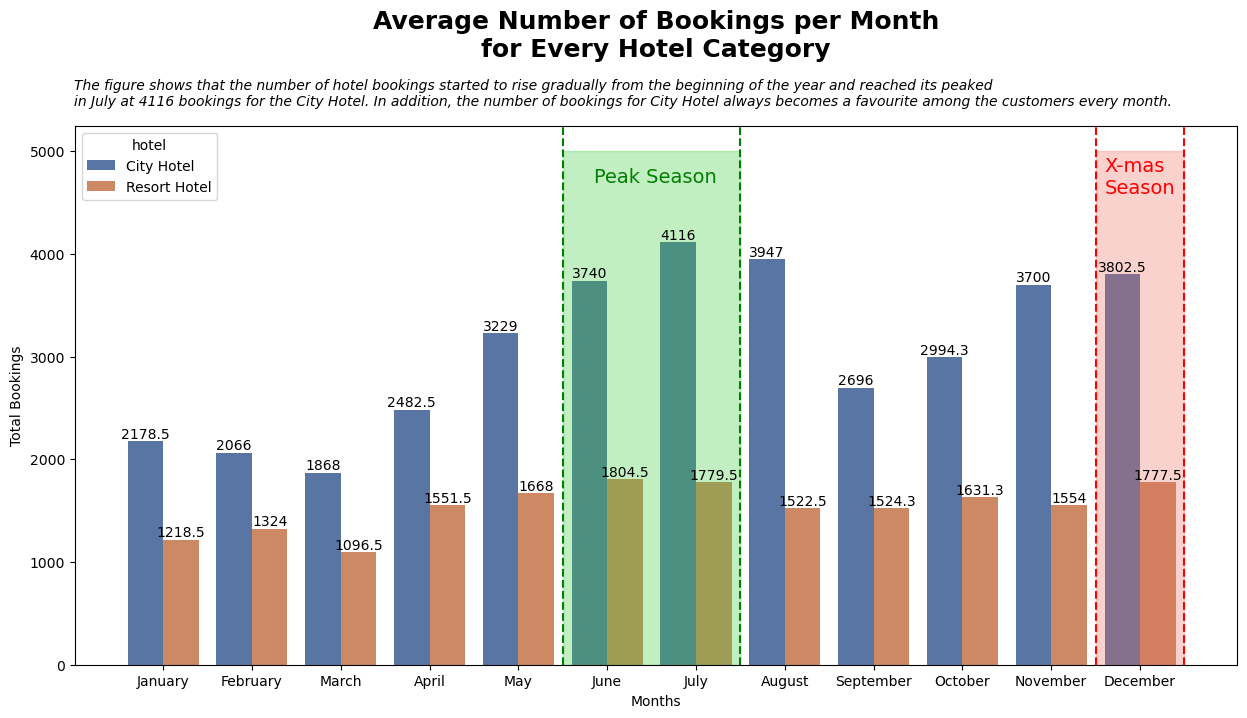

In [9]:
plt.figure(figsize=(15,7))
fig_2 = sns.barplot(data=booking_trends_avg, x='arrival_date_month', y='hotel_count', hue='hotel', palette='deep')

plt.title('Average Number of Bookings per Month\nfor Every Hotel Category',
         fontsize=18, color='black', weight='bold', pad=50)
plt.text(x=-1, y=5450, s='The figure shows that the number of hotel bookings started to rise gradually ' 
         'from the beginning of the year and reached its peaked\nin July at 4116 bookings for the City Hotel. '
         'In addition, the number of bookings for City Hotel always becomes a favourite among the customers every month.',
        fontsize=10, style='italic')

for i in range(2):
    fig_2.bar_label(fig_2.containers[i])

plt.xlabel('Months')
plt.ylabel('Total Bookings')

plt.axvline(4.5, ls='--', color='green')
plt.axvline(6.5, ls='--', color='green')
plt.stackplot(np.arange(4.5,7.5), [[5000]], color='limegreen', alpha=0.3)
plt.text(x=4.85, y=4750, s='Peak Season', fontsize=14, color='green', va='center')

plt.axvline(10.5, ls='--', color='red')
plt.axvline(11.5, ls='--', color='red')
plt.stackplot(np.arange(10.5,12.5), [[5000]], color='#ed6a5e', alpha=0.3)
plt.text(x=10.6, y=4750, s='X-mas\nSeason', fontsize=14, color='red', va='center')

In [10]:
df_new.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status,num_cust
0,0.0,342.0,2017.0,27.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,223.0,0.0,0.0,0.0,0.0,Resort Hotel,September,Breakfast,Kota Denpasar,Direct,Direct,No Deposit,Personal,Check-Out,2.0
1,0.0,737.0,2017.0,27.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,223.0,0.0,0.0,0.0,0.0,Resort Hotel,September,Breakfast,Kota Denpasar,Direct,Direct,No Deposit,Personal,Check-Out,2.0
2,0.0,7.0,2017.0,27.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,199.5,189.0,0.0,75.0,0.0,0.0,Resort Hotel,September,Breakfast,Kabupaten Bangka,Direct,Direct,No Deposit,Personal,Check-Out,1.0
3,0.0,13.0,2017.0,27.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,304.0,43.5,0.0,75.0,0.0,0.0,Resort Hotel,September,Breakfast,Kabupaten Bangka,Corporate,Corporate,No Deposit,Personal,Check-Out,1.0
4,0.0,14.0,2017.0,27.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,240.0,346.0,0.0,98.0,0.0,1.0,Resort Hotel,September,Breakfast,Kabupaten Bangka,Online TA,TA/TO,No Deposit,Personal,Check-Out,2.0


In [11]:
df_new['num_stays'] = df_new.apply(lambda x: x['stays_in_weekend_nights'] + x['stays_in_weekdays_nights'], axis = 1)

In [12]:
df_new.drop(df_new[df_new.num_stays < 1].index, inplace=True)

In [13]:
df_new

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status,num_cust,num_stays
2,0.0,7.0,2017.0,27.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,199.5,189.0,0.0,75.00,0.0,0.0,Resort Hotel,September,Breakfast,Kabupaten Bangka,Direct,Direct,No Deposit,Personal,Check-Out,1.0,1.0
3,0.0,13.0,2017.0,27.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,304.0,43.5,0.0,75.00,0.0,0.0,Resort Hotel,September,Breakfast,Kabupaten Bangka,Corporate,Corporate,No Deposit,Personal,Check-Out,1.0,1.0
4,0.0,14.0,2017.0,27.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,240.0,346.0,0.0,98.00,0.0,1.0,Resort Hotel,September,Breakfast,Kabupaten Bangka,Online TA,TA/TO,No Deposit,Personal,Check-Out,2.0,2.0
5,0.0,14.0,2017.0,27.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,240.0,346.0,0.0,98.00,0.0,1.0,Resort Hotel,September,Breakfast,Kabupaten Bangka,Online TA,TA/TO,No Deposit,Personal,Check-Out,2.0,2.0
6,0.0,0.0,2017.0,27.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,123.5,80.5,0.0,107.00,0.0,0.0,Resort Hotel,September,Breakfast,Kota Denpasar,Direct,Direct,No Deposit,Personal,Check-Out,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.0,23.0,2019.0,35.0,30.0,2.0,5.0,0.0,0.0,0.0,0.0,394.0,108.0,0.0,96.14,0.0,0.0,City Hotel,October,Breakfast,Kabupaten Magelang,Offline TA/TO,TA/TO,No Deposit,Personal,Check-Out,2.0,7.0
119386,0.0,102.0,2019.0,35.0,31.0,2.0,5.0,0.0,0.0,0.0,0.0,9.0,14.0,0.0,225.43,0.0,2.0,City Hotel,October,Breakfast,Kota Yogyakarta,Online TA,TA/TO,No Deposit,Personal,Check-Out,3.0,7.0
119387,0.0,34.0,2019.0,35.0,31.0,2.0,5.0,0.0,0.0,0.0,0.0,9.0,211.0,0.0,157.71,0.0,4.0,City Hotel,October,Breakfast,Kabupaten Bandung,Online TA,TA/TO,No Deposit,Personal,Check-Out,2.0,7.0
119388,0.0,109.0,2019.0,35.0,31.0,2.0,5.0,0.0,0.0,0.0,0.0,89.0,401.5,0.0,104.40,0.0,0.0,City Hotel,October,Breakfast,Kabupaten Bangka,Online TA,TA/TO,No Deposit,Personal,Check-Out,2.0,7.0


In [14]:
df_new.assign(
    cancelation = np.where(df_new['is_canceled']==1, df_new['num_stays'],0)
).groupby('hotel').agg({
    'cancelation':'count',
    'num_stays':'sum'
})

,cancelation,num_stays
hotel,,
City Hotel,78999,236256.0
Resort Hotel,39676,173001.0


In [15]:
df_new['weeks'] = df_new.apply(lambda x: '1 Week' if x['num_stays'] <=7 else '2 Weeks' if x['num_stays'] <=14 else '3 Weeks' if x['num_stays'] <= 21 else '4 Weeks' if x['num_stays'] <= 28 else '>=5 Weeks', axis=1)

In [16]:
df_new['num_stays'].value_counts()

2.0     27643
3.0     27076
1.0     21020
4.0     17383
7.0      8655
5.0      7784
6.0      3857
8.0      1161
10.0     1139
14.0      916
9.0       841
11.0      396
12.0      223
13.0      142
15.0       75
21.0       71
16.0       40
25.0       37
18.0       35
28.0       35
19.0       22
17.0       20
22.0       14
20.0       14
29.0       14
30.0       13
23.0        8
26.0        6
24.0        6
27.0        5
35.0        5
42.0        4
33.0        3
56.0        2
46.0        1
60.0        1
69.0        1
45.0        1
38.0        1
48.0        1
49.0        1
57.0        1
34.0        1
43.0        1
Name: num_stays, dtype: int64

In [17]:
df_new['weeks'].value_counts()

1 Week       113418
2 Weeks        4818
3 Weeks         277
4 Weeks         111
>=5 Weeks        51
Name: weeks, dtype: int64

In [18]:
week_dict = {
    '1 Week':1, '2 Weeks':2,
    '3 Weeks':3, '4 Weeks':4, '>=5 Weeks':5
}

In [19]:
stay_to_cancel = df_new.groupby(['hotel','weeks','is_canceled']).agg(
    num_bookings = ('agent','count'),
).sort_values('weeks', key=lambda x: x.apply(lambda x:week_dict[x])).reset_index()

In [20]:
total_bookings = stay_to_cancel.groupby(['hotel','weeks']).agg({
    'num_bookings':'sum'
}).sort_values('weeks', key=lambda x: x.apply(lambda x:week_dict[x])).reset_index()

In [21]:
total_bookings

,hotel,weeks,num_bookings
0,City Hotel,1 Week,77751
1,Resort Hotel,1 Week,35667
2,City Hotel,2 Weeks,1086
3,Resort Hotel,2 Weeks,3732
4,City Hotel,3 Weeks,108
5,Resort Hotel,3 Weeks,169
6,City Hotel,4 Weeks,28
7,Resort Hotel,4 Weeks,83
8,City Hotel,>=5 Weeks,26
9,Resort Hotel,>=5 Weeks,25


In [22]:
stay_to_cancel = stay_to_cancel.merge(total_bookings, on=['hotel','weeks'])

In [23]:
stay_to_cancel

,hotel,weeks,is_canceled,num_bookings_x,num_bookings_y
0,City Hotel,1 Week,0.0,45348,77751
1,City Hotel,1 Week,1.0,32403,77751
2,Resort Hotel,1 Week,0.0,25760,35667
3,Resort Hotel,1 Week,1.0,9907,35667
4,City Hotel,2 Weeks,0.0,528,1086
5,City Hotel,2 Weeks,1.0,558,1086
6,Resort Hotel,2 Weeks,0.0,2654,3732
7,Resort Hotel,2 Weeks,1.0,1078,3732
8,City Hotel,3 Weeks,0.0,31,108
9,City Hotel,3 Weeks,1.0,77,108


In [24]:
stay_to_cancel_true = stay_to_cancel[stay_to_cancel.is_canceled == 1]

In [25]:
stay_to_cancel_true['percentage'] = stay_to_cancel_true.apply(lambda x: round((x['num_bookings_x']/x['num_bookings_y'])*100), axis=1)

stay_to_cancel_true

,hotel,weeks,is_canceled,num_bookings_x,num_bookings_y,percentage
1,City Hotel,1 Week,1.0,32403,77751,42
3,Resort Hotel,1 Week,1.0,9907,35667,28
5,City Hotel,2 Weeks,1.0,558,1086,51
7,Resort Hotel,2 Weeks,1.0,1078,3732,29
9,City Hotel,3 Weeks,1.0,77,108,71
11,Resort Hotel,3 Weeks,1.0,79,169,47
13,City Hotel,4 Weeks,1.0,21,28,75
14,Resort Hotel,4 Weeks,1.0,39,83,47
16,City Hotel,>=5 Weeks,1.0,20,26,77
19,Resort Hotel,>=5 Weeks,1.0,7,25,28


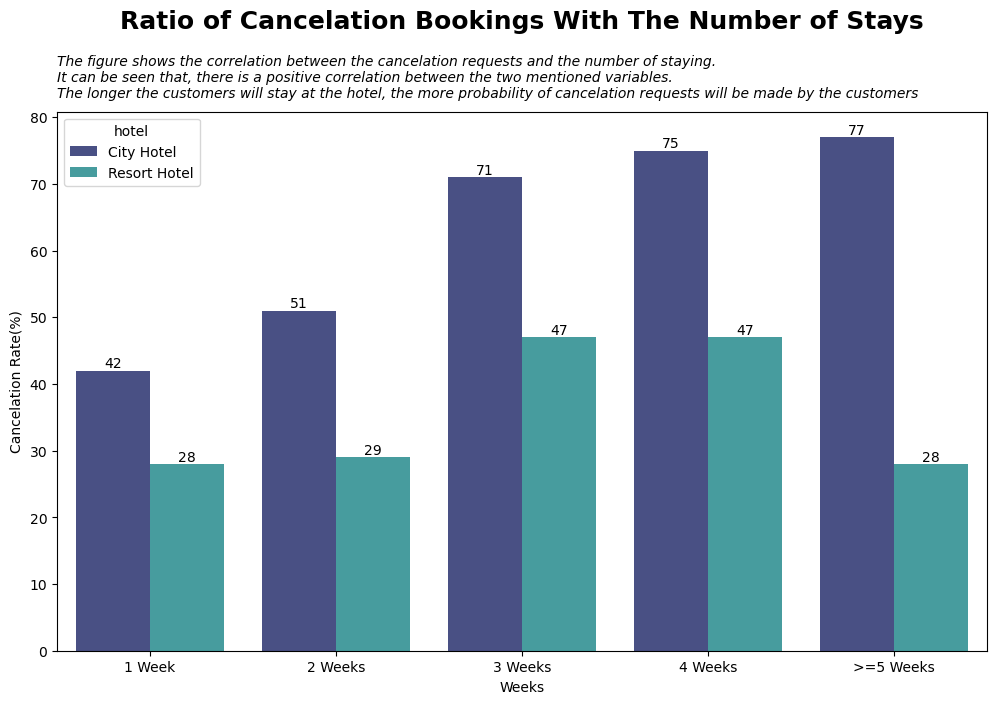

In [26]:
plt.figure(figsize=(12,7))
fig_3 = sns.barplot(data=stay_to_cancel_true, x='weeks', y='percentage', hue='hotel', palette='mako')

plt.xlabel('Weeks')
plt.ylabel('Cancelation Rate(%)')

plt.title('Ratio of Cancelation Bookings With The Number of Stays',
         fontsize=18, color='black', weight='bold', pad=60)
plt.text(x=-0.5, y=83, s='The figure shows the correlation between the cancelation requests and the number of staying.\n'
         'It can be seen that, there is a positive correlation between the two mentioned variables.\n' 
         'The longer the customers will stay at the hotel, the more probability of cancelation requests will be made by the customers'
         ,
        fontsize=10, style='italic')

for i in range(2):
    fig_3.bar_label(fig_3.containers[i])

In [27]:
df_new

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status,num_cust,num_stays,weeks
2,0.0,7.0,2017.0,27.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,199.5,189.0,0.0,75.00,0.0,0.0,Resort Hotel,September,Breakfast,Kabupaten Bangka,Direct,Direct,No Deposit,Personal,Check-Out,1.0,1.0,1 Week
3,0.0,13.0,2017.0,27.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,304.0,43.5,0.0,75.00,0.0,0.0,Resort Hotel,September,Breakfast,Kabupaten Bangka,Corporate,Corporate,No Deposit,Personal,Check-Out,1.0,1.0,1 Week
4,0.0,14.0,2017.0,27.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,240.0,346.0,0.0,98.00,0.0,1.0,Resort Hotel,September,Breakfast,Kabupaten Bangka,Online TA,TA/TO,No Deposit,Personal,Check-Out,2.0,2.0,1 Week
5,0.0,14.0,2017.0,27.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,240.0,346.0,0.0,98.00,0.0,1.0,Resort Hotel,September,Breakfast,Kabupaten Bangka,Online TA,TA/TO,No Deposit,Personal,Check-Out,2.0,2.0,1 Week
6,0.0,0.0,2017.0,27.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,123.5,80.5,0.0,107.00,0.0,0.0,Resort Hotel,September,Breakfast,Kota Denpasar,Direct,Direct,No Deposit,Personal,Check-Out,2.0,2.0,1 Week
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.0,23.0,2019.0,35.0,30.0,2.0,5.0,0.0,0.0,0.0,0.0,394.0,108.0,0.0,96.14,0.0,0.0,City Hotel,October,Breakfast,Kabupaten Magelang,Offline TA/TO,TA/TO,No Deposit,Personal,Check-Out,2.0,7.0,1 Week
119386,0.0,102.0,2019.0,35.0,31.0,2.0,5.0,0.0,0.0,0.0,0.0,9.0,14.0,0.0,225.43,0.0,2.0,City Hotel,October,Breakfast,Kota Yogyakarta,Online TA,TA/TO,No Deposit,Personal,Check-Out,3.0,7.0,1 Week
119387,0.0,34.0,2019.0,35.0,31.0,2.0,5.0,0.0,0.0,0.0,0.0,9.0,211.0,0.0,157.71,0.0,4.0,City Hotel,October,Breakfast,Kabupaten Bandung,Online TA,TA/TO,No Deposit,Personal,Check-Out,2.0,7.0,1 Week
119388,0.0,109.0,2019.0,35.0,31.0,2.0,5.0,0.0,0.0,0.0,0.0,89.0,401.5,0.0,104.40,0.0,0.0,City Hotel,October,Breakfast,Kabupaten Bangka,Online TA,TA/TO,No Deposit,Personal,Check-Out,2.0,7.0,1 Week


In [28]:
df_new['lead_time'].value_counts()

0.0      6027
1.0      3399
2.0      2045
3.0      1805
4.0      1702
         ... 
389.0       1
387.0       1
400.0       1
370.0       1
463.0       1
Name: lead_time, Length: 478, dtype: int64

In [29]:
df_new['lead_months'] = df_new['lead_time'].apply(lambda x: (x-(x//365)*365)//30)

In [30]:
df_new['lead_months'].value_counts()

0.0     38404
1.0     17983
2.0     13139
3.0     10930
4.0      8185
5.0      8031
6.0      5802
7.0      4430
8.0      3565
9.0      3441
10.0     2746
11.0     1789
12.0      230
Name: lead_months, dtype: int64

In [31]:
lead_to_cancel = df_new.groupby(['hotel','is_canceled','lead_months']).agg(
    num_books = ('agent','count')
).reset_index()

In [32]:
total_books = lead_to_cancel.groupby(['hotel','lead_months']).agg(
    total_books = ('num_books','sum')
).reset_index()

In [33]:
task4_merge = lead_to_cancel.merge(total_books, on=['hotel','lead_months'])

In [34]:
task4_df = task4_merge[task4_merge.is_canceled == 1]

In [35]:
task4_df['percentage'] = task4_df.apply(lambda x: round((x['num_books']/x['total_books'])*100, 2), axis=1)

In [36]:
task4_df

,hotel,is_canceled,lead_months,num_books,total_books,percentage
1,City Hotel,1.0,0.0,5468,23261,23.51
3,City Hotel,1.0,1.0,5119,12802,39.99
5,City Hotel,1.0,2.0,4107,9435,43.53
7,City Hotel,1.0,3.0,3695,7853,47.05
9,City Hotel,1.0,4.0,2579,5661,45.56
11,City Hotel,1.0,5.0,2863,5322,53.80
13,City Hotel,1.0,6.0,1886,3747,50.33
15,City Hotel,1.0,7.0,1347,2593,51.95
17,City Hotel,1.0,8.0,1398,2271,61.56
19,City Hotel,1.0,9.0,1846,2531,72.94


Text(-1.1, 133, 'The figure shows the correlation between the cancelation requests and the lead time.\nIt shows that, there is also a positive correlation between the two mentioned variables like the previous.\nThe longer the customers book the hotel reservation, the more probability of cancelation requests will also be made by the customers')

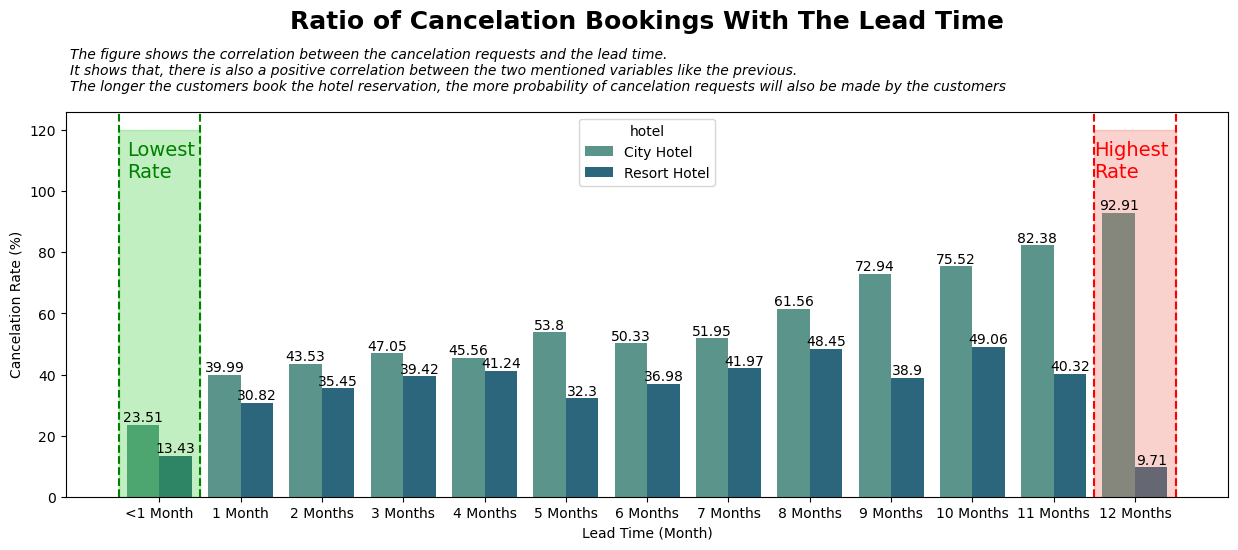

In [47]:
plt.figure(figsize=(15,5))
fig_4 = sns.barplot(data=task4_df, x='lead_months', y='percentage', hue='hotel', palette='crest')

for i in range(2):
    fig_4.bar_label(fig_4.containers[i])

plt.xlabel('Lead Time (Month)')
plt.ylabel('Cancelation Rate (%)')
plt.xticks(np.arange(13),[
    '<1 Month', '1 Month', '2 Months', '3 Months', '4 Months', '5 Months', '6 Months', '7 Months', '8 Months',
    '9 Months', '10 Months', '11 Months', '12 Months'
           ])

plt.axvline(-0.5, ls='--', color='green')
plt.axvline(0.5, ls='--', color='green')
plt.stackplot(np.arange(-0.5,1.5), [[120]], color='limegreen', alpha=0.3)
plt.text(x=-0.4, y=110, s='Lowest\nRate', fontsize=14, color='green', va='center')

plt.axvline(11.5, ls='--', color='red')
plt.axvline(12.5, ls='--', color='red')
plt.stackplot(np.arange(11.5,13.5), [[120]], color='#ed6a5e', alpha=0.3)
plt.text(x=11.5, y=110, s='Highest\nRate', fontsize=14, color='red', va='center')

plt.title('Ratio of Cancelation Bookings With The Lead Time',
         fontsize=18, color='black', weight='bold', pad=60)
plt.text(x=-1.1, y=133, s='The figure shows the correlation between the cancelation requests and the lead time.\n'
         'It shows that, there is also a positive correlation between the two mentioned variables like the previous.\n' 
         'The longer the customers book the hotel reservation, the more probability of cancelation requests will also be made by the customers'
         ,
        fontsize=10, style='italic')